# Notebook6 Jafuno Douba

# Exercice 1

In [1]:
rttrans <- function(n, q, theta){
  obs <- rt(n, q) + theta
  return(obs)
}

Essayons la fonction **rrtrans**

In [2]:
rttrans(10, 10, 10)
rttrans(5, 1, -2)

# Exercice 2

In [3]:
moy_student <- function(n, q, theta, K){
  moy <- 1:K
  for (k in 1:K){
    obs <- rttrans(n, q, theta)
    moy[k] <- mean(obs)}
  return(moy)
}

# Exercice 3

In [4]:
risque <- function(theta, hat.theta){
  risk <- mean((hat.theta - theta)^2)
  return(risk)
}

# Exercice 4

## Question 1

In [5]:
n <- 50
q <- 5
theta <- 0

risque(theta, moy_student(n, q, theta, 10))
risque(theta, moy_student(n, q, theta, 100))
risque(theta, moy_student(n, q, theta, 1000))
risque(theta, moy_student(n, q, theta, 10000))

En executant chaque ligne plusieurs fois, on choisit d'utiliser désormais $K=10000$.  Définissons $K=1000$ comme valeur par défaut dans la fonction **moy_student** :

In [6]:
moy_student <- function(n, q, theta, K = 10000){
  moy <- 1:K
  for (k in 1:K){
    obs <- rttrans(n, q, theta)
    moy[k] <- mean(obs)}
  return(moy)
}

## Question 2

[1] 0.165182130 0.033793753 0.016774015 0.008332815 0.001643752

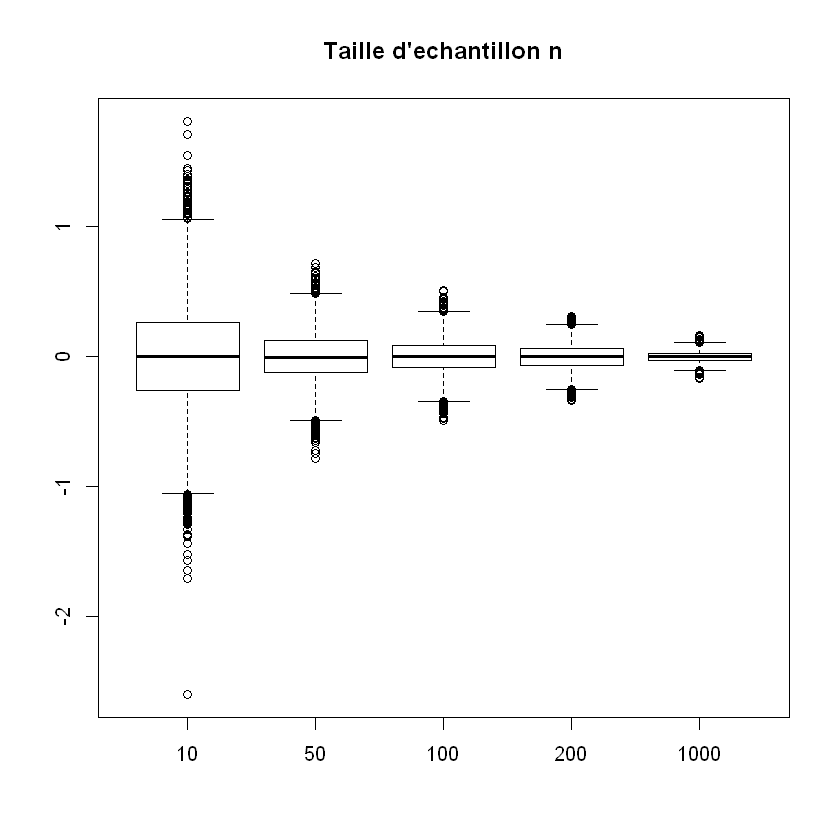

In [7]:
q <- 5
theta <- 0
res <- data.frame(1:10000)
vec_n <- c(10, 50, 100, 200, 1000)
risque_n <- 1:length(vec_n)
for (j in 1:length(vec_n)){
  n <- vec_n[j]
  hat.theta <- moy_student(n, q, theta)
  res[, j] <- hat.theta
  risque_n[j] <- risque(theta, hat.theta)
}
boxplot(res, names=as.character(vec_n), main="Taille d'echantillon n")
risque_n 

On observe bien la convergence de la moyenne empirique vers $\theta$ lorsque $n$ tend vers l'infini. Les valeurs décroissantes du risque quadratique indiquent la même chose. 

Par ailleurs, on observe que la vitesse de convergence du risque est bien en $1/n$. (Quand on passe de $n=10$ à $n=100$ ou de $n=100$ à $n=1000$, le risque est divisé par 10.)

## Question 3

[1] 0.03300087 0.03246482 0.03304716 0.03338434

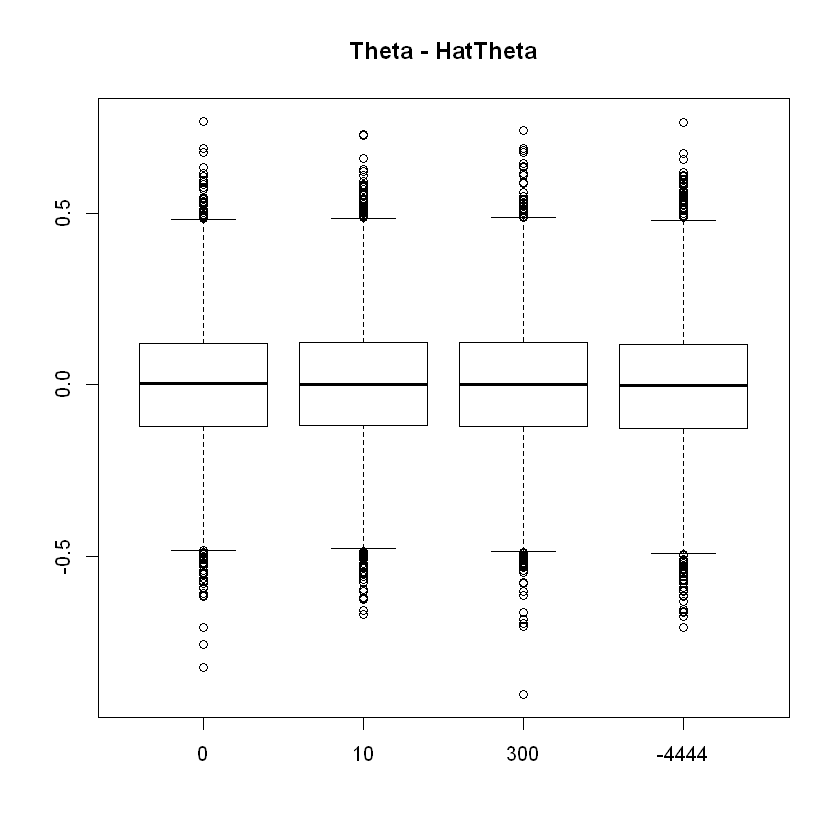

In [8]:
q <- 5
n <- 50
res <- data.frame(1:10000)
vec_theta <- c(0, 10, 300, -4444)
risque_theta <- 1:length(vec_theta)

for (j in 1:length(vec_theta)){
  theta <- vec_theta[j]
  hat.theta <- moy_student(n, q, theta)
  res[, j] <- hat.theta - theta
  risque_theta[j] <- risque(theta, hat.theta)
}
boxplot(res, names=as.character(vec_theta), main = "Theta - HatTheta")
risque_theta

Les 4 boxplots sont quasi identiques. Par conséquent, la valeur de $\theta$ n'influence 
pas sur la qualité d'estimation par la moyenne empirique. C'est typique pour un paramètre de position.

## Question 4

[1] 3.417308e+03 2.348857e-01 3.291768e-02 2.526040e-02 2.074169e-02

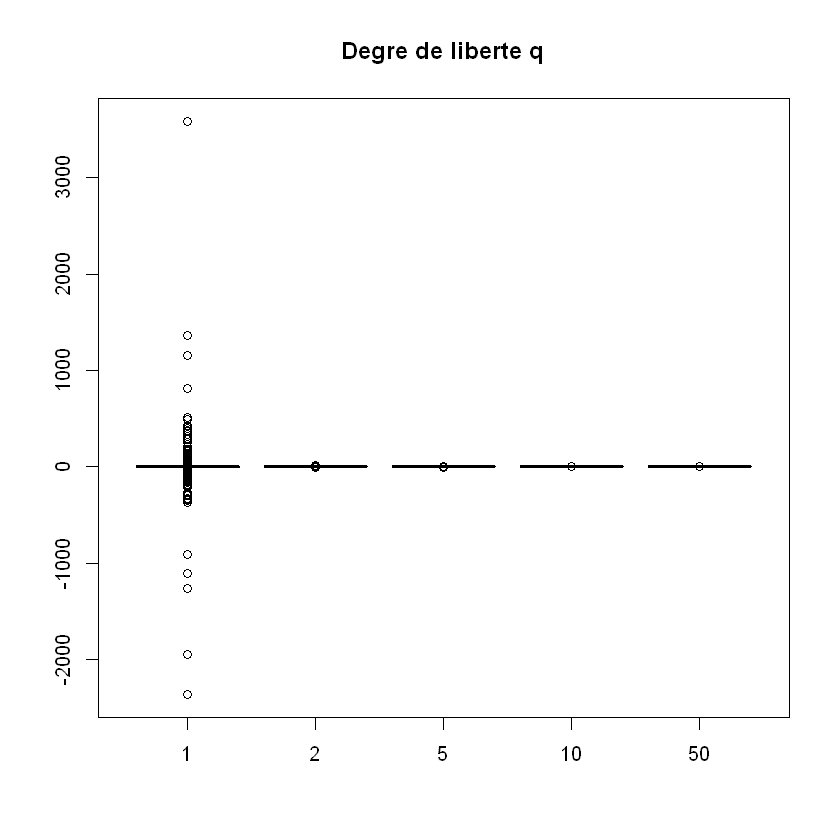

In [9]:
n <- 50
theta <- 0
res <- data.frame(1:10000)
vec_q <- c(1, 2 ,5, 10, 50)
risque_q <- 1:length(vec_q)
for (j in 1:length(vec_q)){
  q <- vec_q[j]
  hat.theta <- moy_student(n, q, theta)
  res[, j] <- hat.theta
  risque_q[j] <- risque(theta, hat.theta)
}
boxplot(res, names = as.character(vec_q), main = "Degre de liberte q")
risque_q

On observe que l'estimation de theta quand q=1 est catastrophique. L'estimation s'ameliore au fur et à mesure que q augmente. En effet, lorsque $q=1$ la loi de Student n'est pas intégrable. Donc, la moyenne empirique n'est pas consistante. Il se trouve que plus le degré de liberté est grand, plus les queues de la loi de Student sont légères. Il paraît que la moyenne empirique est autant plus performante que les queues de la loi des données sont légères.